In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import urllib
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt

In [ ]:
class DogDetector:
    def __init__(self):
        # Загрузка предварительно обученной Faster R-CNN модели
        self.model = fasterrcnn_resnet50_fpn(pretrained=True)
        self.model.eval()

    def is_dog(self, image_path):
        # Загрузка и преобразование изображения
        image = Image.open(image_path).convert('RGB')
        image_tensor = F.to_tensor(image).unsqueeze(0)

        # Передача изображения через Faster R-CNN
        with torch.no_grad():
            prediction = self.model(image_tensor)

        # Проверка, обнаружена ли собака
        labels = prediction[0]['labels'].tolist()
        return any(label == 18 for label in labels)  # 18 - код класса ImageNet для собаки


In [ ]:
class DogBreedClassifierInference:
    def __init__(self):
        # Загрузка предварительно обученной модели ResNet50
        self.model = models.resnet50(pretrained=True)
        self.model.eval()

        # Преобразования изображений
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

        # Загрузка меток классов
        url = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
        class_labels = urllib.request.urlopen(url).read().decode()
        self.class_labels = class_labels.split('\n')

    def classify_dog_breed(self, image_path):
        # Загрузка и преобразование изображения
        image = Image.open(image_path).convert('RGB')
        image_tensor = self.transform(image).unsqueeze(0)

        # Передача изображения через модель
        with torch.no_grad():
            outputs = self.model(image_tensor)

        # Получение предсказания
        _, predicted_idx = torch.max(outputs, 1)
        predicted_label = self.class_labels[predicted_idx.item()]

        return predicted_label


"Staffordshire Bull Terrier",


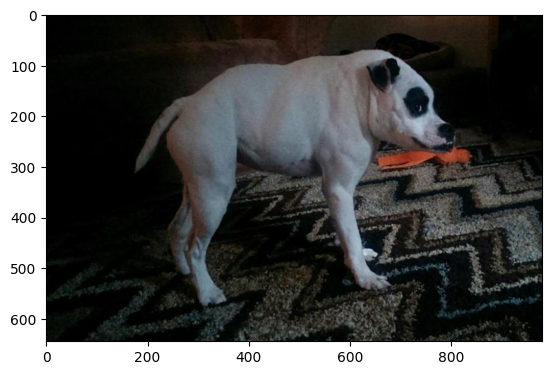

In [ ]:
dog_detector = DogDetector()
inference_model = DogBreedClassifierInference()
image_path = "/content/sample_data/img.jpeg"
if dog_detector.is_dog(image_path):
  print(inference_model.classify_dog_breed(image_path))
  plt.imshow(Image.open(image_path))
else:
  print("Собака не найдена")